In [1]:
import numpy as np
import os
import pandas as pd

In [104]:
'''''This script demonstrates how to build a variational autoencoder with Keras. 
 
Reference: "Auto-Encoding Variational Bayes" https://arxiv.org/abs/1312.6114 
'''  
import numpy as np  
import matplotlib.pyplot as plt  
from scipy.stats import norm  
  
from keras.layers import Input, Dense, Lambda  
from keras.models import Model  
from keras import backend as K  
from keras import objectives  
from keras.datasets import mnist  
from keras.utils.vis_utils import plot_model  
import sys  
  

batch_size = 100  
original_dim = 256   
latent_dim = 2
intermediate_dim = 256  
nb_epoch = 50  
epsilon_std = 1.0  
  
#my tips:encoding  
x = Input(shape=(original_dim,))  
h = Dense(intermediate_dim, activation='relu')(x)  
z_mean = Dense(latent_dim)(h)  
z_log_var = Dense(latent_dim)(h)  
#z1_mean  = Dense
#z1_log_var = Dense


#my tips:Gauss sampling,sample Z  
def sampling(args):   
    z_mean, z_log_var = args  
    epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0.,stddev=epsilon_std)  
    return z_mean + K.exp(z_log_var / 2) #* epsilon +0.5*(z1_mean +K.   if we want to use Guassian-mixture models



z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

 
decoder_h = Dense(intermediate_dim, activation='relu')(z) 
decoder_mean = Dense(original_dim, activation='sigmoid')(decoder_h)




def vae_loss(x, decoder_mean):  
    xent_loss = original_dim * objectives.binary_crossentropy(x,decoder_mean)
    kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)  
    return xent_loss + kl_loss  

vae = Model(x, decoder_mean) 
vae.compile(optimizer='rmsprop', loss=vae_loss)  

newdata = pd.read_csv("ISING_simul/IsingModel16_16simul.csv").values
for i in range(len(newdata)):
    for j in range(len(newdata[0])):
        newdata[i][j] = (newdata[i][j]+1)/2
index = [i for i in range(len(newdata))]
import random
random.shuffle(index)
newdata = newdata[index]
x_train = newdata[:15000]
x_test = newdata[15000:20000]





In [105]:
vae.fit(x_train, x_train,  
        shuffle=True,  
        nb_epoch=nb_epoch,  
        #verbose=2,  
        batch_size=100,  
        validation_data=(x_test, x_test))  

/Users/sunhop/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 15000 samples, validate on 5000 samples
Epoch 1/50
15000/15000 [==============================] - 1s - loss: 124.8100 - val_loss: 105.7159
Epoch 2/50
15000/15000 [==============================] - 0s - loss: 104.8324 - val_loss: 105.8790
Epoch 3/50
15000/15000 [==============================] - 0s - loss: 103.4804 - val_loss: 102.3503
Epoch 4/50
15000/15000 [==============================] - 0s - loss: 102.7530 - val_loss: 101.7819
Epoch 5/50
15000/15000 [==============================] - 0s - loss: 102.4260 - val_loss: 101.7864
Epoch 6/50
15000/15000 [==============================] - 0s - loss: 102.2147 - val_loss: 101.3809
Epoch 7/50
15000/15000 [==============================] - 0s - loss: 102.0509 - val_loss: 101.5773
Epoch 8/50
15000/15000 [==============================] - 0s - loss: 101.9585 - val_loss: 101.6162
Epoch 9/50
15000/15000 [==============================] - 0s - loss: 101.9120 - val_loss: 101.6628
Epoch 10/50
15000/15000 [==============================] - 0

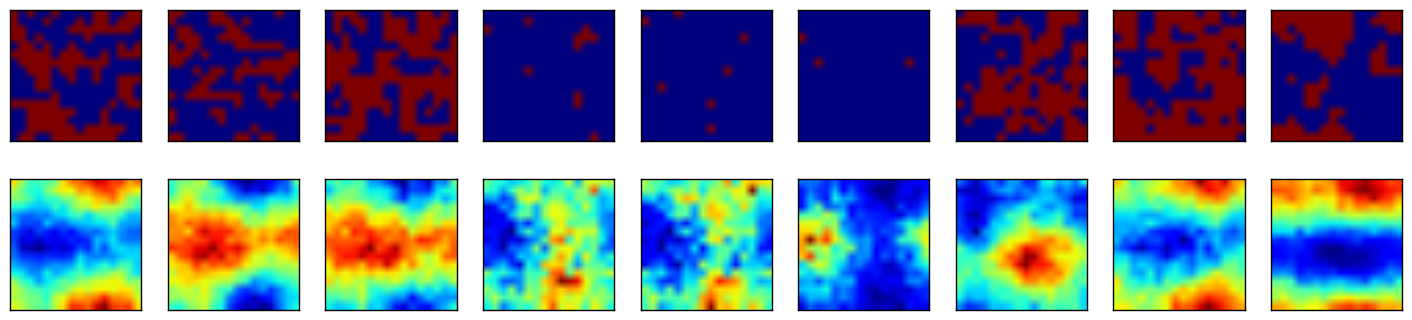

In [106]:
# encode and decode some digits
# note that we take them from the *test* set
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

#encoded_imgs = encoder.predict(x_test)
decoded_imgs = vae.predict(x_test,batch_size=100)


n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2,n,i)
    plt.imshow(np.round(x_test[i].reshape(16, 16)))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n ,i + n)
    plt.imshow((decoded_imgs[i].reshape(16,16)))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

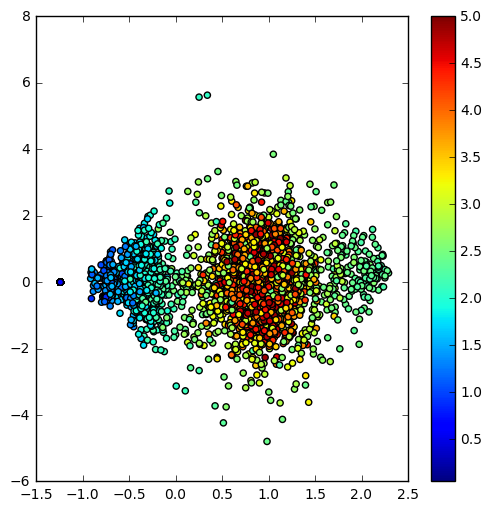

In [107]:
T = np.zeros((20099,))
u=5.025
for i in range(20099):
    
    if i%101==0:
        u = u- 0.025
    T[i]=u
T = T[index]

T_train = T[:15000]
T_test = T[15000:20000]
y_test = np.zeros((len(x_test),))
for i in range(len(x_test)):
    y_test[i]= np.sum(x_test[i])

encoder = Model(x, z_mean)
  
# display a 2D plot of the digit classes in the latent space  
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)  
plt.figure(figsize=(6, 6))  
plt.scatter( x_test_encoded[:, 0] ,x_test_encoded[:, 1] , c=T_test)  
plt.colorbar()  
plt.show()  
  


In [103]:
decoded_imgs[3]

array([ 0.53436613,  0.52356339,  0.5134756 ,  0.51559287,  0.51742655,
        0.51066041,  0.52287126,  0.52080762,  0.5173918 ,  0.51799327,
        0.52438623,  0.52789706,  0.52008909,  0.52641076,  0.52272242,
        0.53731537,  0.51993722,  0.52444202,  0.5183329 ,  0.52124816,
        0.52193713,  0.51763511,  0.52867359,  0.53027248,  0.53261864,
        0.52092922,  0.51927912,  0.5262472 ,  0.5125885 ,  0.52489966,
        0.51559615,  0.52167058,  0.53505343,  0.54061848,  0.53463757,
        0.52525491,  0.52445215,  0.51776367,  0.52714121,  0.52920312,
        0.53008753,  0.51497555,  0.53083372,  0.52958578,  0.52906549,
        0.52598834,  0.51902622,  0.51696849,  0.52646464,  0.53187716,
        0.53467083,  0.52563435,  0.52039582,  0.52043122,  0.52146327,
        0.53092438,  0.52928746,  0.5268234 ,  0.53283739,  0.52720094,
        0.5233984 ,  0.52132666,  0.53185779,  0.53426188,  0.53386903,
        0.52310187,  0.53342444,  0.53028345,  0.51960921,  0.52

In [99]:
x_test[3]

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1])

In [101]:
np.round(decoded_imgs[3])

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1